In [1]:
cd ..

c:\Users\jeong\Desktop\python\action-recognition-practice


In [2]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from time import time
import processing.nia2019v1 as nia

In [3]:
root_path = "./data/raw"
output_path = "./data/preprocessed"

In [20]:
metadata_list = nia.get_all_metadata(root_path)
metadata = metadata_list[0]
action = metadata.objects[0].actions[0]
print(metadata.filename)
print(metadata.video_filename)
action.name, action.starttime, action.duration

c:\Users\jeong\Desktop\python\action-recognition-practice\data\raw\[강도] 실내(크로마키)_01\178-1_robbery02_place02_night\178-1_cam01_robbery02_place02_night_spring.xml
c:\Users\jeong\Desktop\python\action-recognition-practice\data\raw\[강도] 실내(크로마키)_01\178-1_robbery02_place02_night\178-1_cam01_robbery02_place02_night_spring.mp4


('threaten', '0:02:44.633333', '0:00:01.700000')

In [16]:
resolution = "768x480"
width, height = np.array(resolution.split('x')).astype('int')
starttime = time()
config = {
    "hwaccel_output_format": "cuda",
    "c:v": "hevc_cuvid",
    "ss": action.starttime,
    "t": action.duration,
}
frames, _ = (
    ffmpeg
    .input(metadata.video_filename, **config)
    .filter('fps', fps=3, round='up')
    .filter('scale', size=resolution)
    .output('pipe:', format='rawvideo', pix_fmt='rgb24')
    .run(capture_stdout=True)
)
frames = (
    np
    .frombuffer(frames, np.uint8)
    .reshape([-1, height, width, 3])
)

In [17]:
frames.shape

(5, 480, 768, 3)

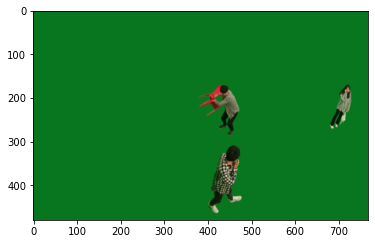

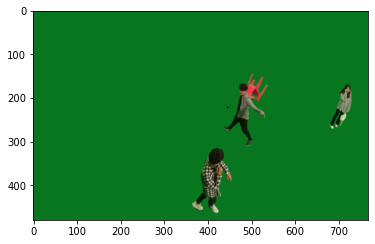

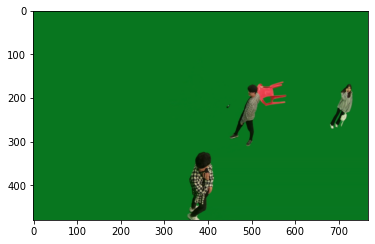

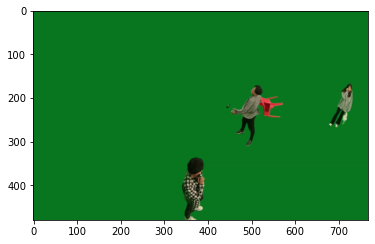

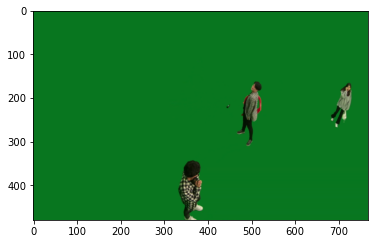

In [18]:
for f in frames:
    plt.imshow(f)
    plt.show()